In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
import seaborn as sns
from tensorflow.keras import regularizers

In [43]:
data = pd.read_excel("C:/Users/chapa/Documents/Capstone/final_data.xlsx")

In [44]:
data

,Date,EPS,Book Value,COF,Dividend,inflation,Remittance Growth Rate(%),Open,High,Low,Close,Volume,MA_10,MACD,MA_30,Compound Sensitivity,Bollinger_Bandwidth
0,2018-04-27,46.70,210.00,4.63,0.48,6.00,7.0,1050.0,1050.0,1020.0,1030.0,13380,1030.10,9.680262,1004.400000,0.0000,103.757521
1,2018-04-28,46.70,210.00,4.63,0.48,6.00,7.0,1050.0,1050.0,1020.0,1030.0,13380,1030.10,9.680262,1004.400000,0.0000,103.757521
2,2018-04-29,46.70,210.00,4.63,0.48,6.00,7.0,1015.0,1020.0,1002.0,1015.0,7378,1032.60,8.143550,1004.400000,0.0000,123.336877
3,2018-04-30,46.70,210.00,4.63,0.48,6.00,7.0,1015.0,1020.0,1002.0,1015.0,7378,1032.60,8.143550,1004.400000,0.0000,123.336877
4,2018-05-01,46.70,210.00,4.63,0.48,6.00,7.0,1015.0,1020.0,1002.0,1015.0,7378,1032.60,8.143550,1004.400000,0.0000,123.336877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,2023-09-26,27.82,214.69,7.81,0.30,7.52,25.8,596.0,596.0,586.2,587.3,51037,591.93,-4.659392,587.483333,0.9987,-125.871484
1979,2023-09-27,27.82,214.69,7.81,0.30,7.52,25.8,596.0,596.0,586.2,587.3,51037,591.93,-4.659392,587.390000,0.9987,-125.851453
1980,2023-09-28,27.82,214.69,7.81,0.30,7.52,25.8,596.0,596.0,586.2,587.3,51037,591.93,-4.659392,587.300000,0.9987,-125.832137
1981,2023-09-29,27.82,214.69,7.81,0.30,7.52,25.8,596.0,596.0,586.2,587.3,51037,591.93,-4.659392,587.300000,0.9987,-125.832137


In [45]:
data.head()

,Date,EPS,Book Value,COF,Dividend,inflation,Remittance Growth Rate(%),Open,High,Low,Close,Volume,MA_10,MACD,MA_30,Compound Sensitivity,Bollinger_Bandwidth
0,2018-04-27,46.7,210.0,4.63,0.48,6.0,7.0,1050.0,1050.0,1020.0,1030.0,13380,1030.1,9.680262,1004.4,0.0,103.757521
1,2018-04-28,46.7,210.0,4.63,0.48,6.0,7.0,1050.0,1050.0,1020.0,1030.0,13380,1030.1,9.680262,1004.4,0.0,103.757521
2,2018-04-29,46.7,210.0,4.63,0.48,6.0,7.0,1015.0,1020.0,1002.0,1015.0,7378,1032.6,8.143550,1004.4,0.0,123.336877
3,2018-04-30,46.7,210.0,4.63,0.48,6.0,7.0,1015.0,1020.0,1002.0,1015.0,7378,1032.6,8.143550,1004.4,0.0,123.336877
4,2018-05-01,46.7,210.0,4.63,0.48,6.0,7.0,1015.0,1020.0,1002.0,1015.0,7378,1032.6,8.143550,1004.4,0.0,123.336877


In [46]:
data.tail()

,Date,EPS,Book Value,COF,Dividend,inflation,Remittance Growth Rate(%),Open,High,Low,Close,Volume,MA_10,MACD,MA_30,Compound Sensitivity,Bollinger_Bandwidth
1978,2023-09-26,27.82,214.69,7.81,0.3,7.52,25.8,596.0,596.0,586.2,587.3,51037,591.93,-4.659392,587.483333,0.9987,-125.871484
1979,2023-09-27,27.82,214.69,7.81,0.3,7.52,25.8,596.0,596.0,586.2,587.3,51037,591.93,-4.659392,587.390000,0.9987,-125.851453
1980,2023-09-28,27.82,214.69,7.81,0.3,7.52,25.8,596.0,596.0,586.2,587.3,51037,591.93,-4.659392,587.300000,0.9987,-125.832137
1981,2023-09-29,27.82,214.69,7.81,0.3,7.52,25.8,596.0,596.0,586.2,587.3,51037,591.93,-4.659392,587.300000,0.9987,-125.832137
1982,2023-09-30,27.82,214.69,7.81,0.3,7.52,25.8,596.0,596.0,586.2,587.3,51037,591.93,-4.659392,587.300000,0.9987,-125.832137


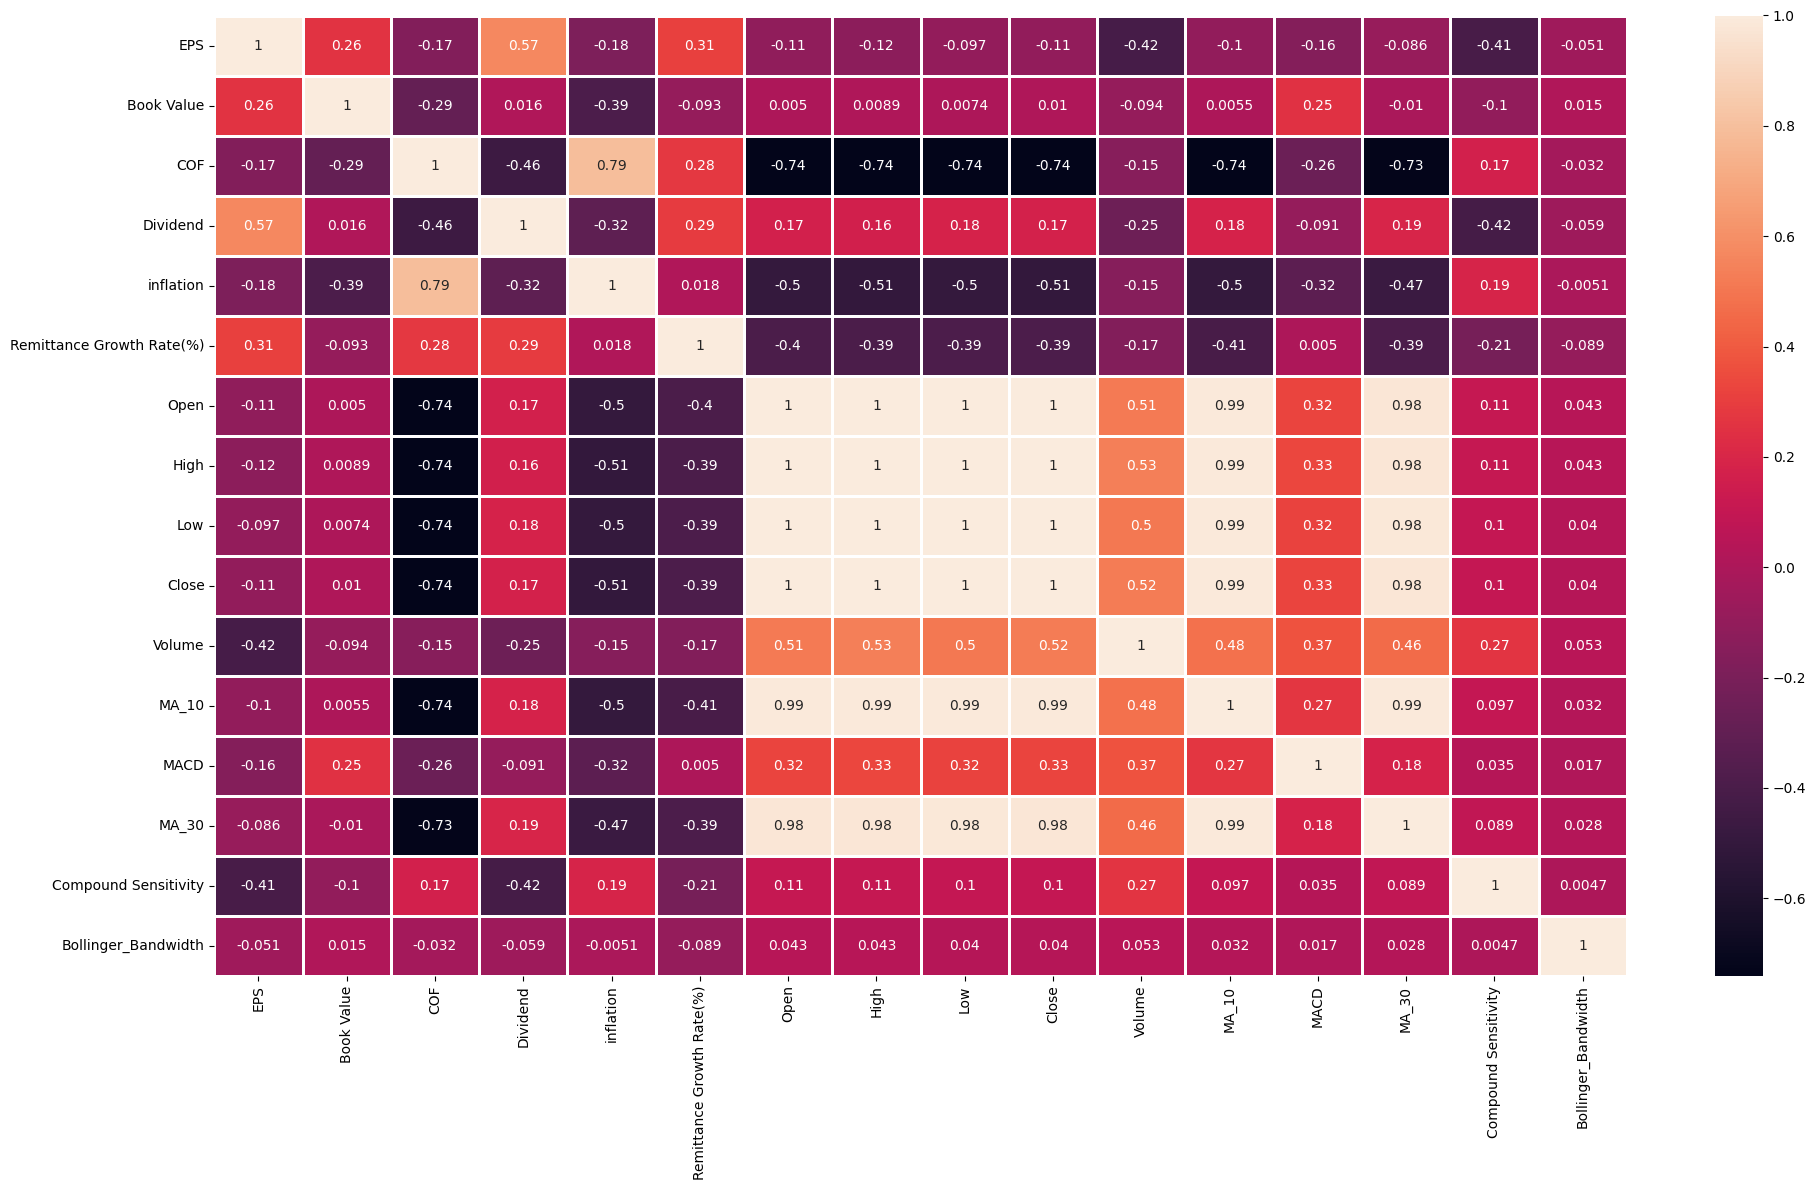

In [47]:
plt.figure(figsize=(20,12))
sns.heatmap(data.drop(columns = "Date").corr(),annot = True, linewidth = 2 )
plt.tight_layout()

In [48]:
data.columns

Index(['Date', 'EPS', 'Book Value', 'COF', 'Dividend', 'inflation',
       'Remittance Growth Rate(%)', 'Open', 'High', 'Low', 'Close', 'Volume',
       'MA_10', 'MACD', 'MA_30', 'Compound Sensitivity',
       'Bollinger_Bandwidth'],
      dtype='object')

In [49]:
columns_to_drop = ['Book Value','Bollinger_Bandwidth','Open', 'High', 'Low','Volume']


data = data.drop(columns=columns_to_drop)


In [50]:
data.columns

Index(['Date', 'EPS', 'COF', 'Dividend', 'inflation',
       'Remittance Growth Rate(%)', 'Close', 'MA_10', 'MACD', 'MA_30',
       'Compound Sensitivity'],
      dtype='object')

In [51]:
data.shape[1]

11

In [52]:
features_to_exclude = ['Date','Close']
features = data.columns.difference(features_to_exclude)
df = data[features]

In [53]:
df

,COF,Compound Sensitivity,Dividend,EPS,MACD,MA_10,MA_30,Remittance Growth Rate(%),inflation
0,4.63,0.0000,0.48,46.70,9.680262,1030.10,1004.400000,7.0,6.00
1,4.63,0.0000,0.48,46.70,9.680262,1030.10,1004.400000,7.0,6.00
2,4.63,0.0000,0.48,46.70,8.143550,1032.60,1004.400000,7.0,6.00
3,4.63,0.0000,0.48,46.70,8.143550,1032.60,1004.400000,7.0,6.00
4,4.63,0.0000,0.48,46.70,8.143550,1032.60,1004.400000,7.0,6.00
...,...,...,...,...,...,...,...,...,...
1978,7.81,0.9987,0.30,27.82,-4.659392,591.93,587.483333,25.8,7.52
1979,7.81,0.9987,0.30,27.82,-4.659392,591.93,587.390000,25.8,7.52
1980,7.81,0.9987,0.30,27.82,-4.659392,591.93,587.300000,25.8,7.52
1981,7.81,0.9987,0.30,27.82,-4.659392,591.93,587.300000,25.8,7.52


In [54]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)



In [55]:
sequence_length = 30
X, y = [], []

In [56]:
for i in range(len(df) - sequence_length):
    X.append(df[i:i + sequence_length])
    y.append(data.iloc[i + sequence_length]['Close'])



In [57]:

print("X:")
for i in range(5):  
    print(X[i])

print("\ny:")
for i in range(5):  
    print(y[i])


X:
[[0.08232446 0.49992499 1.         0.83471074 0.54757719 0.43923304
  0.41903174 0.45306859 0.55555556]
 [0.08232446 0.49992499 1.         0.83471074 0.54757719 0.43923304
  0.41903174 0.45306859 0.55555556]
 [0.08232446 0.49992499 1.         0.83471074 0.54019498 0.44170264
  0.41903174 0.45306859 0.55555556]
 [0.08232446 0.49992499 1.         0.83471074 0.54019498 0.44170264
  0.41903174 0.45306859 0.55555556]
 [0.08232446 0.49992499 1.         0.83471074 0.54019498 0.44170264
  0.41903174 0.45306859 0.55555556]
 [0.08232446 0.49992499 1.         0.83471074 0.53166607 0.44298683
  0.41903174 0.45306859 0.55555556]
 [0.08232446 0.49992499 1.         0.83471074 0.52463525 0.44367832
  0.41903174 0.45306859 0.55555556]
 [0.08232446 0.49992499 1.         0.83471074 0.52463525 0.44367832
  0.41903174 0.45306859 0.55555556]
 [0.08232446 0.49992499 1.         0.83471074 0.52463525 0.44367832
  0.41903174 0.45306859 0.55555556]
 [0.08232446 0.49992499 1.         0.83471074 0.5173254  0.44

In [58]:
X = np.array(X)
y = np.array(y)


In [59]:
y = scaler.fit_transform(y.reshape(-1, 1))

In [60]:
X.shape

(1953, 30, 9)

In [61]:
y.shape

(1953, 1)

In [62]:
y

array([[0.38024231],
       [0.40260951],
       [0.39049394],
       ...,
       [0.00680336],
       [0.00680336],
       [0.00680336]])

In [63]:
train_size = int(len(df) * 0.65)  # 65% for training
val_size = int(len(df) * 0.15)  # 15% for validation
test_size = int(len(df) * 0.2)  # 20% for testing

X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

In [64]:
X_test.shape

(368, 30, 9)

In [65]:
y_test.shape

(368, 1)

In [66]:
# Create the model
# model = Sequential()
# model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, df.shape[1])))
# model.add(LSTM(50, return_sequences=True))
# model.add(LSTM(50))
# model.add(Dense(1))
# 
# model = Sequential()
# model.add(LSTM(25, input_shape=(sequence_length, df.shape[1])))
# model.add(Dense(1))


In [67]:

model = Sequential()
model.add(LSTM(8, input_shape=(sequence_length, df.shape[1]), kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.1))  # You can adjust the dropout rate as needed
model.add(Dense(1, kernel_regularizer=regularizers.l2(0.001)))


In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 8)                 576       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 585 (2.29 KB)
Trainable params: 585 (2.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [70]:
#X_test = X_test[:-1] 

258/258 [==============================] - 3s 11ms/step - loss: 0.0026 - val_loss: 0.0093


258/258 [==============================] - 3s 10ms/step - loss: 0.0024 - val_loss: 0.0069


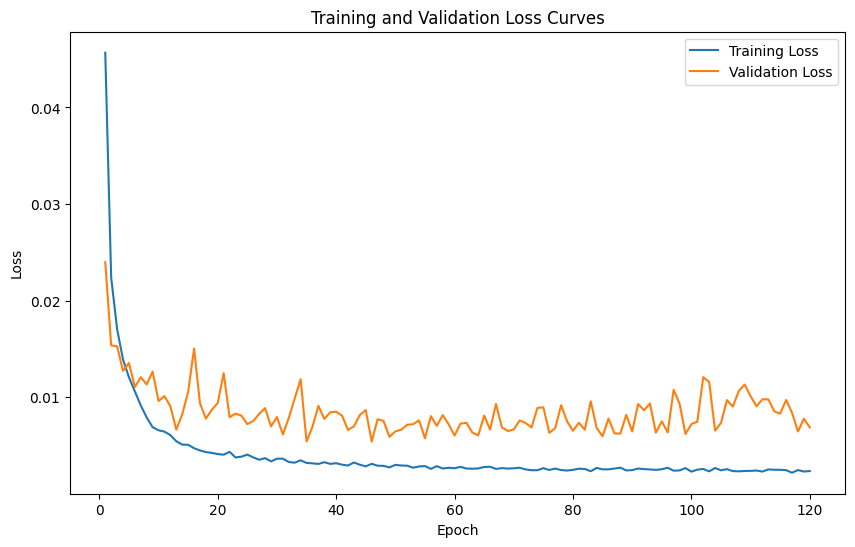

In [71]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
epochs = 120
batch_size = 5
# Define the TensorBoard callback
log_dir = "logs"  # You can change the log directory to your desired location
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Initialize lists to store training and validation losses
train_losses = []
val_losses = []

# Modify your training loop to include the TensorBoard callback
for i in range(epochs):
    # Train for one epoch
    history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[tensorboard_callback])

    # Append training and validation losses to their respective lists
    train_losses.append(history.history['loss'][0])
    val_losses.append(history.history['val_loss'][0])

# Plot the training and validation loss curves
import matplotlib.pyplot as plt

epochs_range = range(1, epochs + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_losses, label='Training Loss')
plt.plot(epochs_range, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()


In [72]:
# Evaluate the model on the complete test data
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")



12/12 [==============================] - 0s 4ms/step - loss: 0.0074
Test Loss: 0.007439581677317619


In [73]:
predicted_values = model.predict(X_test)


12/12 [==============================] - 0s 3ms/step


In [74]:
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test, predicted_values)
rmse = math.sqrt(mse)
print(f"RMSE: {rmse}")

# Define a custom function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, predicted_values)
print(f"MAPE: {mape}%")


RMSE: 0.08351100633933847
MAPE: inf%


C:\Users\chapa\AppData\Local\Temp\ipykernel_11256\2390602243.py:10: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


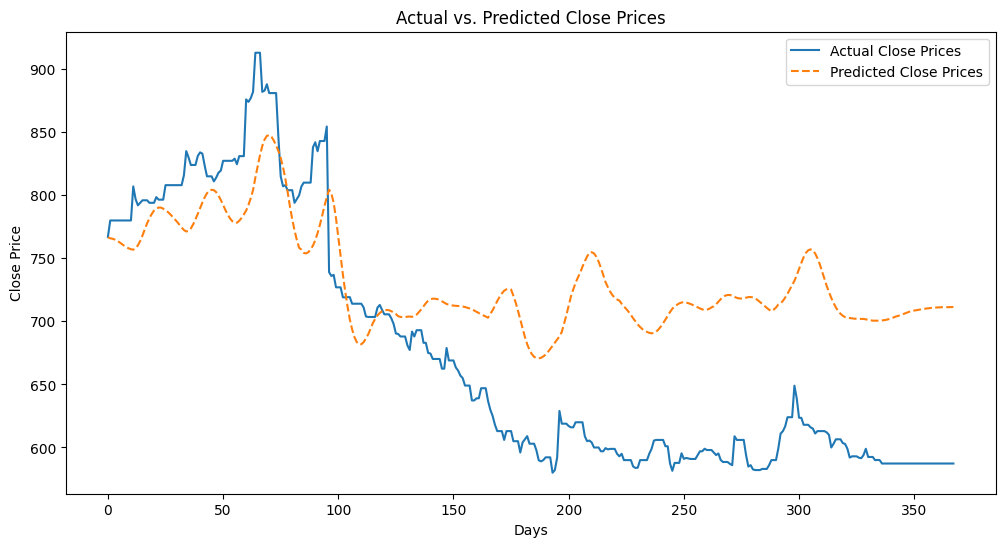

In [75]:

# Inverse transform the scaled predicted values to get actual prices
predicted_close_prices = scaler.inverse_transform(predicted_values)
actual_values = scaler.inverse_transform(y_test)
# Plot the actual Close values and predicted Close values
plt.figure(figsize=(12, 6))
plt.plot(actual_values, label='Actual Close Prices')
plt.plot(predicted_close_prices, label='Predicted Close Prices', linestyle='--')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Prices')
plt.legend()
plt.show()


In [76]:
predicted_close_prices = scaler.inverse_transform(predicted_values)

In [77]:
predicted_close_prices

array([[766.57776],
       [765.8658 ],
       [765.51843],
       [764.8525 ],
       [763.91473],
       [762.72577],
       [761.38696],
       [760.04285],
       [758.8443 ],
       [757.8866 ],
       [757.2121 ],
       [756.82104],
       [757.90894],
       [760.25604],
       [763.6977 ],
       [768.068  ],
       [773.00586],
       [777.67303],
       [781.69476],
       [785.11835],
       [787.82745],
       [789.3518 ],
       [790.2355 ],
       [790.2296 ],
       [789.35284],
       [787.8592 ],
       [786.77106],
       [785.01166],
       [783.03973],
       [781.0098 ],
       [778.96045],
       [776.65155],
       [774.4148 ],
       [772.4068 ],
       [771.2647 ],
       [771.70306],
       [773.6794 ],
       [776.9167 ],
       [780.89984],
       [785.19226],
       [789.7349 ],
       [794.21643],
       [798.3484 ],
       [801.61664],
       [803.5459 ],
       [804.32153],
       [804.0416 ],
       [802.4298 ],
       [799.717  ],
       [796.2491 ],


In [78]:
close_prices = scaler.inverse_transform(y_test)

In [79]:
close_prices

array([[767. ],
       [780. ],
       [780. ],
       [780. ],
       [780. ],
       [780. ],
       [780. ],
       [780. ],
       [780. ],
       [780. ],
       [780. ],
       [807. ],
       [797. ],
       [792. ],
       [794. ],
       [796. ],
       [796. ],
       [796. ],
       [794. ],
       [794. ],
       [794. ],
       [798.5],
       [796.5],
       [796.5],
       [796.5],
       [808. ],
       [808. ],
       [808. ],
       [808. ],
       [808. ],
       [808. ],
       [808. ],
       [808. ],
       [816. ],
       [835. ],
       [830. ],
       [824. ],
       [824. ],
       [824. ],
       [831.1],
       [834. ],
       [833. ],
       [823.5],
       [815. ],
       [815. ],
       [815. ],
       [811. ],
       [814. ],
       [817.9],
       [819.5],
       [827.3],
       [827.3],
       [827.3],
       [827.3],
       [827.3],
       [829. ],
       [824.6],
       [831. ],
       [831. ],
       [831. ],
       [876. ],
       [874. ],
       [

In [80]:
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(close_prices, predicted_close_prices)
rmse = math.sqrt(mse)
print(f"RMSE: {rmse}")

# Define a custom function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(close_prices, predicted_close_prices)
print(f"MAPE: {mape}%")


RMSE: 89.60730608622583
MAPE: 12.498785263148172%
